In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35725 non-null  int64  
 1   key                35725 non-null  object 
 2   fare_amount        35725 non-null  float64
 3   pickup_datetime    35725 non-null  object 
 4   pickup_longitude   35724 non-null  float64
 5   pickup_latitude    35724 non-null  float64
 6   dropoff_longitude  35724 non-null  float64
 7   dropoff_latitude   35724 non-null  float64
 8   passenger_count    35724 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.5+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,3.572500e+04,35725.000000,35724.000000,35724.000000,35724.000000,35724.000000,35724.000000
mean,2.765762e+07,11.394681,-72.561212,39.942645,-72.572503,39.943957,1.677024
std,1.604217e+07,10.085005,10.911110,6.047059,10.852786,6.043435,1.294493
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,1.367902e+07,6.000000,-73.992033,40.734753,-73.991475,40.733846,1.000000
50%,2.757853e+07,8.500000,-73.981821,40.752563,-73.980170,40.752855,1.000000
75%,4.151460e+07,12.900000,-73.967196,40.767152,-73.963545,40.768076,2.000000
max,5.542169e+07,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [11]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

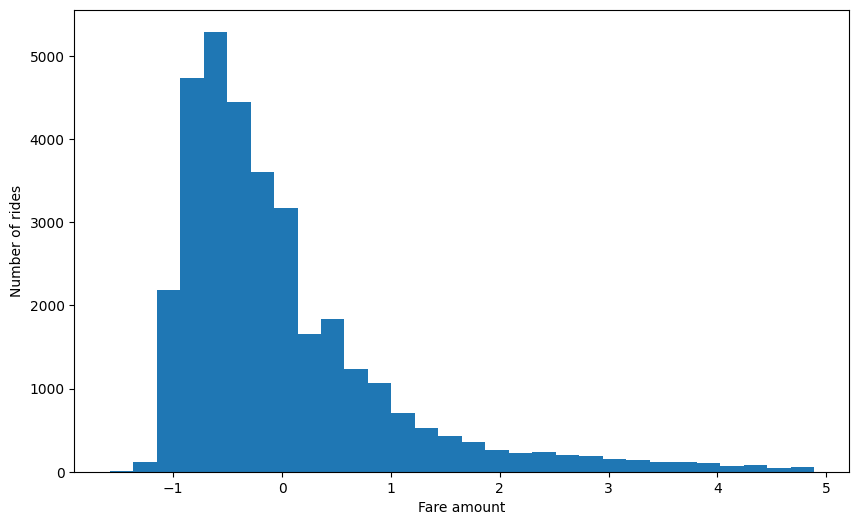

In [13]:
# Generate a histogram for the fare amounts
plt.figure(figsize=(10,6))
plt.hist(df_scaled['fare_amount'], bins=30)
plt.xlabel('Fare amount')
plt.ylabel('Number of rides')
plt.show()

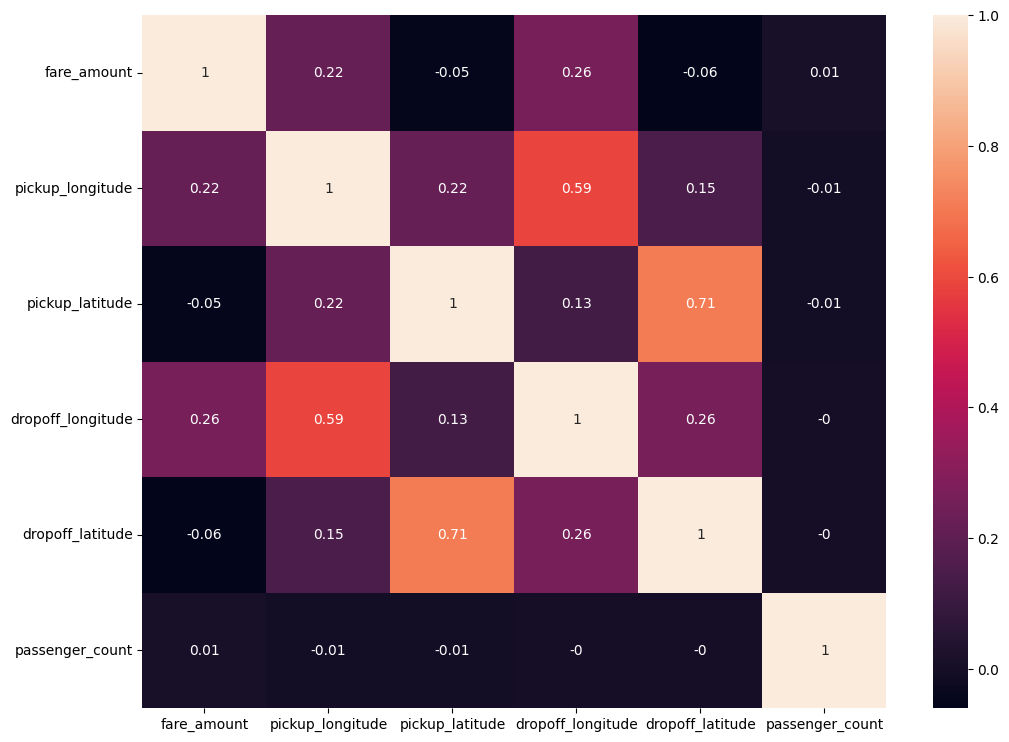

In [14]:
correlation_matrix = df_scaled.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()